<a href="https://colab.research.google.com/github/Junoflows/DeepLearning_From_Scratch1/blob/main/chapter_6_%ED%95%99%EC%8A%B5_%EA%B4%80%EB%A0%A8_%EA%B8%B0%EC%88%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6 학습 관련 기술들

## 6.1 매개변수 갱신

+ 신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매겨변수를 찾는 것이다.
+ 이는 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 __최적화__라고 한다.
+ 매개변수 공간은 매우 넓고 복잡해서 최적화는 굉장히 어려운 문제이다.

+ 지금까지 최적의 매개변수 값을 찾는 방법으로 매개변수의 기울기(미분)을 이용했다.
+ 매개변수의 기울기를 구해 기울어진 방향으로 매개변수 값을 갱신하는 일을 반복해서  
최적의 값에 다가갔다.
+ 이는 __확률적 경사 하강법(SGD)__이란 단순한한 방법이다.
+ 문제에 따라 SGD보다 좋은 방법도 있는데, SGD의 단점을 알아보고 다른 최적화 기법을 알아보자.

### 6.1.1 확률적 경사 하강법(SGD)

+ SGD를 수식으로 표현하면 다음과 같다.

$ W \leftarrow W - \eta \frac{\partial L}{\partial W}$

$W$ : 갱신할 가중치 매개변수  
$\frac{∂L}{∂W}$ :$W$에 대한 손실 함수의 기울기  
$η$ : 학습률 0.01, 0.001 같은 값을 미리 정해서 사용

+ SGD는 기울어진 방향으로 일정 거리만 가겠다는 방법이다.
+ SGD를 구현해보자.

In [ ]:
class SGD:
  def __init__(self, lr = 0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

+ 초기화 때 받는 인수 lr은 learning rate(학습률)을 뜻한다.
+ update(params, grads) 메서드는 SGD 과정에서 반복해서 불러온다.
+ params와 grads는 각각 가중치 매개변수와 기울기를 저장하고 있다.
+ SGD 클래스를 사용한 신경망 매개변수의 진행은 다음과 같이 수행할 수 있다.

In [ ]:
# network = TwoLayerNet(...)
# optimizer = SGD()

# for i in range(10000):
#   ...
#   x_batch, t_batch = get_mini_batch(...) # 미니배치
#   grads = network.gradient(x_batch, t_batch)
#   params = network.params
#   optimizer.update(params, grads)
#   ...

+ 매개변수 갱신은 optimizer가 수행하므로 optimizer에 매개변수와 기울기 정보만 넘겨주면 된다.
+ 이처럼 최적화를 담당하는 클래스를 분리해 구현하면 기능을 모듈화하기 좋다.
+ 모멘텀이라는 최적회 기법도 update(params, grads)라는 공통의 메서드를 갖도록 구현한다.

__NOTE__<br/>
대부분의 딥러닝 프레임워크는 다양한 최적화 기법을 구현해 제공하며,  
원하는 기법으로 쉽게 바꿀 수 있는 구조로 되어 있다.

### 6.1.2 SGD의 단점

+ SGD는 단순하고 구현도 쉽지만, 문제에 따라 비효율적일 때가 있다.
+ 다음 함수의 최솟값을 구하는 문제를 생각해보자.

$f(x,y) = \frac{1}{20}x^{2}+y^{2}$

<img src='http://drive.google.com/uc?export=view&id=1F9qP2JvlhsJC9zRYQpCC5wNKLUOYolRH' width = 550/><br>

+ 함수의 기울기를 그려보면 아래 그림처럼 된다.
+ 이 기울기는 y축 방향은 크고 x축 방향은 작다는 것이 특징이다.
+ 즉 y축 방향은 가파르고 x축 방향은 완만한 것이다.
+ 주의할 점은 최솟값이 되는 장소는 $(x,y) = (0,0)$ 이지만  
아래 그림이 보여주는 기울기 대부분은 (0,0) 방향을 가리키지 않는다는 점이다.

<img src='http://drive.google.com/uc?export=view&id=1Y2RpuKvIntgQpE0nemIJGWmBj-aNqpeF' height = 300/><br>

+ 위 함수에 SGD를 적용해보자. 초깃값은 $(x,y) = (-7.0, 2.0)$으로 한다.

<img src='http://drive.google.com/uc?export=view&id=1Ove7v1rb3MIxyF4VgrJLkfQgeLkEQ0FP' height = 300 /><br>

+ SGD는 지그재그로 비효율적인 움직임을 볼 수 있다.
+ 즉 SGD의 단점은 비등방성 함수(방향에 따라 성질이 달라지는 함수)에서는  
탐색 경로 비효율적이라는 것이다.
+ SGD의 단점을 개선해주는 모멘텀, AdaGrad, Adam 세 방법을 알아보자.

### 6.1.3 모멘텀

+ __모멘텀__은 운동량을 뜻하는 수식은 다음과 같다.

$ v ← αv - η\frac{∂L}{\partial W}$ <br/>
$ W ← W + v $

$W$ : 가중치 매개변수 <br/>
$ \frac{∂L}{\partial W}$ : $W$에 대한 손실 함수의 기울기 <br/>
$η$ : 학습률<Br/>
$v$ : 물리에서의 속도

+ 첫번째 식은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리법칙을 의미한다.
+ 모멘텀은 아래 그림처럼 곡면을 따라 구르는 듯한 움직임을 보여준다.

<img src='http://drive.google.com/uc?export=view&id=1I4TWQ0-elxrkUP3r-tlAKo69Myf1MaH3' width = 550 /><br>

+ $\alpha v $ 항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다.($α$는 0.9 등의 값으로 설정함)
+ 물리에서의 지면 마찰이나 공기 저항에 해당한다.
+ 모멘텀을 구현해보자.

In [ ]:
class Momentum:
  def __init__(self, lr = 0.01, momentum = 0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

    for key in params.keys():
      self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
      params[key] += self.v

+ v는 물체의 속도로 초기화 때는 아무 값도 담지 않고  
update( )가 처음 호출될 때 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장한다.
+ 모멘텀을 사용하여 최적화 문제를 풀어보자.

<img src='http://drive.google.com/uc?export=view&id=1LoHrAGfLrpJE3coRpsyu9JDdg4_cp0g4' width = 550/><br>

+ 모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯 움직인다.
+ SGD와 비교하면 '지그재그 정도'가 덜한 것을 알 수 있다.
+ 이는 x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문이다.
+ 반대로 y축의 힘은 크지만 위 아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않다.
+ 전체적으로는 SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어든다.

### 6.1.4 AdaGrad

+ 신경망 학습에서는 학습률($η$) 값이 중요한데,  
이 값이 너무 작으면 학습 시간이 너무 길어지고 너무 크면 발산하여 학습이 제대로 이뤄지지 않는다.
+ 학습률을 정하는 효과적 기술로 __학습률 감소__가 있다.  
이는 학습을 진행하면서 학습률을 점차 줄여가는 방법이다.
+ 처음에는 크게 학습하다가 조금씩 작게 학습한다는 것으로 실제 신경망 학습에 자주 쓰인다.
+ 학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 '전체'의 학습률 값을 일괄적으로 낮추는 것이다.
+ 이를 발전시킨 것이 AdaGrad으로 각각의 매개변수에 맞춤형 값을 만들어준다.

+ AdaGrad 갱신 방법의 수식은 다음과 같다.

$ h ← h + \frac{∂L}{∂W} ⊙ \frac{∂L}{∂W}$ <br/><br/>
$ W ← W - \eta \frac{1}{\sqrt h}  \frac{∂L}{∂W}$

$W$ : 가중치 매개변수 <br/>
$ \frac{∂L}{\partial W}$ : $W$에 대한 손실 함수의 기울기 <br/>
$η$ : 학습률<Br/>
$h$ : 기존 기울기 값을 제곱하여 더해줌(⊙ 기호는 행렬의 원소별 곱셈을 의미함)

+ 매개변수를 갱신할 때 $\frac{1}{\sqrt h}$을 곱해 학습률을 조정한다.
+ 매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 뜻으로  
학습률 감소가 매개변수의 원소마다 다르게 적용됨을 뜻한다.

__NOTE__<br/>
AdaGrad는 과거의 기울기를 제곱하여 계속 더해간다. 그래서 학습을 진행할수록 갱신 강도가 약해진다.  
실제로 무한히 계속 학습한다면 어느 순간 갱신량이 0이 되어 전혀 갱신되지 않게 된다.  
이 문제를 개선한 기법으로 RMSProp 방법이 있다.  
이는 모든 기울기를 균일하게 더해가는 것이 아니라 과거의 기울기는 서서히 잊고 새로운 기울기를 크게 반영한다.  
이를 __지수이동평균__ 이라 하여 과거 기울기의 반영 규모를 기하급수적으로 감소시킨다.

+ AdaGrad의 구현을 살펴보자.

In [ ]:
import numpy as np

In [ ]:
class AdaGrad:
  def __init__(self, lr = 0.01):
    self.lr = lr
    self.h = None

  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)

    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

+ 여기서 주의할 것은 마지막 줄에 1e-7 이라는 작은 값을 더하는 부분이다.
+ 이 값은 self.h[key]에 0이 담겨 있다 해도 0으로 나누는 사태를 막아준다.
+ 대부분의 딥러닝 프레임워크에서는 이 값도 인수로 설정할 수 있다.


+ AdaGrad를 사용하여 아래 식의 최적화 문제를 풀어보자.
> $f(x,y) = \frac{1}{20}x^{2}+y^{2}$

<img src='http://drive.google.com/uc?export=view&id=1wm1b7Vceoqrb7Gww9UgOAt0wp9Ir9mJw' width = 550/><br>

+ 위 그림을 보면 최솟값을 향해 효율적으로 움직이는 것을 알 수 있다.
+ y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 갱신 정도도 큰 픅으로 작아지도록 조정된다.
+ 따라서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어든다.

### 6.1.5 Adam

+ 모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보였다.
+ AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했다.
+ 이 두 기법을 융합한다는 생각에서 출발한 기법이 Adam이다.

+ Adam은 하이퍼파라미터의 '편향 보정'이 진행된다는 특징이 있다.
+ Adam을 사용하여 아래 식의 최적화 문제를 풀어보자.
> $f(x,y) = \frac{1}{20}x^{2}+y^{2}$

<img src='http://drive.google.com/uc?export=view&id=11EMlZUHjWYdaBj7VZmgHeVQq4yUVjwcZ' width = 550/><br>

+ Adam 갱신 과정도 그릇 바닥을 구르듯 움직인다.
+ 모멘텀과 비슷한 패턴이지만 공의 좌우 흔들림은 더 적다.  
이는 학습의 갱신 강도를 적응적으로 조정해서 얻은 혜택이다.

__NOTE__  
Adam은 하이퍼파라미터를 3개 설정한다. 하나는 지금까지의 학습률, 나머지 두 개는 일차 모멘텀용 계수($β_1$)와 이차 모멘텀용 계수($β_2$)이다. 기본 설정값은 $β_1$은 0.9, $β_2$는 0.999이며, 이 값이면 많은 경우에 좋은 결과를 얻을 수 있다.

### 6.1.6 어느 갱신 방법을 이용할 것인가?

+ 지금까지 알아본 4개의 매개변수 갱신 방법을 비교해보자.

<img src='http://drive.google.com/uc?export=view&id=1y4VAZOPgRtc6v__ah07SZBu8lBA4MOsS' width = 550/><br>

+ 사용한 기법에 따라 갱신 경로가 다르다.
+ 언듯 봤을 때는 AdaGrad가 가장 나은 것 같지만,  
풀어야 할 문제에 따라 사용할 기법의 종류가 달라지므로 주의해야 한다.
+ 또한 하이퍼파라미터 값에 따라 결과가 바뀐다.

__NOTE__  
지금도 많은 연구에서 SGD를 사용하고 있다. 모멘텀과 AdaGrad도 시도할만한 가치가 충분하다.  
최근에는 Adam도 많이 사용하고 있으니 각자에 상황을 고려하여 여러 가지로 시도하면 된다.

### 6.1.7 MNIST 데이터셋으로 본 갱신 방법 비교

+ 손글씨 숫자 인식을 대상으로 네가지 기법을 비교해보자. 이는 각 방법의 학습 진도의 차이를 보여준다.

<img src='http://drive.google.com/uc?export=view&id=1VnjqzU-Lo3_0WS6VhNr3Q8x2uSmkBw0W' width = 550/><br>

+ 이 실험은 각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로 사용해 측정했다.
+ 결과를 보면 SGD의 학습 진도가 가장 느리고 나머지 세 기법의 진도는 비슷하다.
+ 이 실험에서 주의할 점은 하이퍼파라미터인 학습률과 신경망의 구조에 따라 결과가 달라진다.
+ 일반적으로는 SGD보다 다른 세 기법이 빠르게 학습하고 최종 정확도도 높게 나타난다.

## 6.2 가중치의 초깃값

+ 신경망 학습에서 특히 중요한 것이 가중치의 초깃값이다.
+ 가중치의 초깃값을 무엇으로 설정하느냐에 따라 신경망 학습의 성패가 결정되기도 한다.
+ 권장 초깃값에 대해 알아보고 실험을 통해 실제로 신경망 학습이 신속하게 이뤄지는 모습을 살펴보자.

### 6.2.1 초깃값을 0으로 하면?

+ __가중치 감소__ 기법은 오버피팅을 억제해 범용 성능을 높이는 기술이다.
+ 이는 가중치 매개변수의 값이 작아지도록 학습하는 방법으로 오버피팅이 일어나지 않게 한다.

+ 가중치를 작게 하려면 초깃값도 최대한 작은 값에서 시작하는 것이 정공법이다.
+ 가중치의 초깃값을 모두 0으로 설정하면 어떻게 될까?
+ 이는 나쁜 아이디어로 이렇게 설정하면 학습이 올바로 이뤄지지 않는다.
+ 그 이유는 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다.

예를 들어 2층 신경망에서 첫 번째와 두 번째 층의 가중치가 0이라고 가정하자.
+ 순전파 때는 입력층의 가중치가 0이기 때문에 두 번째 층의 뉴런에 모두 같은 값이 전달된다.
+ 두 번째 층의 모든 뉴런에 같은 값이 입력된다는 것은  
역전파 때 두 번째 층의 가중치가 모두 똑같이 갱신된다는 것이다.
+ 그래서 가중치들은 같은 초깃값에서 시작하고 갱신을 거쳐도 여전히 같은 값을 유지하는 것이다.
+ 이는 가중치를 여러 개 갖는 의미를 사라지게 하므로 초깃값을 무작위로 설정해야 한다.

### 6.2.2 은닉층의 활성화값 분포

+ 은닉층의 활성화값의 분포를 관찰하면 중요한 정보를 얻을 수 있다.
+ 가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지 간단한 실험을 해보자.
+ 활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에  
무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화값 분포를 히스토그램으로 그려보자.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000,100) # 1000개의 데이터
node_num = 100
hidden_layer_size = 5
activations = {}

In [ ]:
for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 1
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z

+ 층이 5개가 있으며, 각 층의 뉴런은 100개씩이다.
+ 입력 데이터로서 1000개의 데이터를 정규분포로 무작위로 생성하여 이 5층 신경망에 흘린다.
+ 활성화 함수로는 시그모이드 함수를 이용했고, 각 층의 활성화 결과를 activations 변수에 저장한다.
+ 표준편차가 1인 정규분포를 이용했는데 이 표준편차를 바꿔가며  
활성화값들의 분포가 어떻게 변화하는지 관찰하는 것이 이 실험의 목적이다.
+ activations에 저장된 각 층의 활성화값 데이터를 히스토그램으로 그려보자.

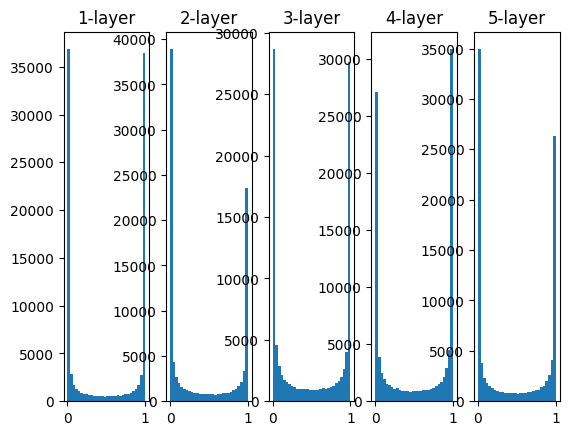

In [ ]:
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + '-layer')
  plt.hist(a.flatten(), 30, range = (0,1))

plt.show()

+ 각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있다.
+ 여기서 사용한 시그모이드 함수는 출력이 0또는 1에 가까워지자 미분은 0에 다가가기 때문에  
데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라진다.
+ 이것이 __기울기 소실__ 이라고 알려진 문제이다.
+ 층을 깊게 하는 딥러닝에서는 기울기 소실은 더 심각한 문제가 될 수 있다.

+ 이번엔 가중츼의 표준편차를 0.01로 바꿔 같은 실험을 반복해보자.

In [ ]:
for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  # w = np.random.randn(node_num, node_num) * 1
  w = np.random.randn(node_num, node_num) * 0.01
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z

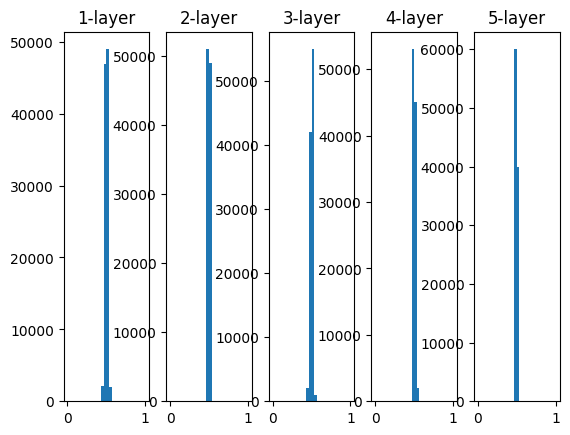

In [ ]:
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + '-layer')
  plt.hist(a.flatten(), 30, range = (0,1))

plt.show()

+ 이번에는 0.5 부근에 집중되었다. 0과 1로 치우치진 않았으니 기울기 소실 문제는 일어나지 않는다.
+ 하지만 활성화값들이 치우쳤다는 것은 표현력 관점에서는 큰 문제가 있는 것이다.
+ 즉 다수의 뉴런이 거의 같은 값을 출력하니 뉴런을 여러 개 둔 의미가 없어진다는 뜻이다.
+ 따라서 활성화값들이 치우치면 __표현력을 제한__한다는 관점에서 문제가 된다.

__WARNING__
> 각 층의 활성화값은 적당히 고루 분포되어야 한다. 층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적으로 이뤄지기 때문이다. 반대로 치우친 데이터가 흐르면 기울기 소실이나 표현력 제한 문제에 빠져서 학습이 잘 이뤄지지 않는 경우가 생긴다.

+ 이어서 *사비에르 글로로트*, *요슈아 벤지오*의 논문에서 권장하는 __Xavier 초깃값__을 써보자.
+ Xavier 초깃값은 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있다.
+ 예를 들어 카페 프레임워크는 가중치 초깃값을 설정할 때 인수로 xavier을 지정할 수 있다.

+ 이 논문은 각 층의 활성화값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 했다.
+ 앞 계층의 노드가 n개라면 표준편차가 $\frac{1}{\sqrt n}$인 분포를 사용하면 된다는 결론이 나왔다.

<img src='http://drive.google.com/uc?export=view&id=14OWu5TeB4_UpMJNQRoYjYmA4IEKquRou' width = 550
 /><br>

+ Xavier 초깃값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다.
+ Xavier 초깃값을 써서 실험해보자.

In [ ]:
for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  # w = np.random.randn(node_num, node_num) * 1
  # w = np.random.randn(node_num, node_num) * 0.01
  w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z

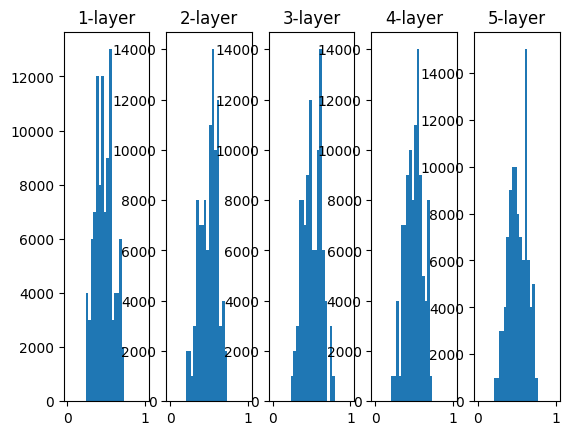

In [ ]:
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + '-layer')
  plt.hist(a.flatten(), 30, range = (0,1))

plt.show()

+ 이 결과를  보면 층이 깊어지면서 형태가 다소 일그러지지만, 확실히 넓게 분포됨을 알 수 있다.
+ 각 층에 흐르는 데이터는 적당히 퍼져 있으므로,  
시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것이라 예상할 수 있다.

__NOTE__  
위 그림은 오른쪽으로 갈수록 약간씩 일그러지고 있다.  
이 일그러짐은 sigmoid 함수 대신 tanh함수(쌍곡선 함수)를 이용하면 개선된다.  
실제로 tanh 함수를 이용하면 말끔한 종 모양으로 분포된다.  
tanh 함수도 sigmoid 함수와 같은 S자 곡선 함수이다.  
다만 tanh 함수가 원점 대칭인 반면 sigmoid 함수는 (0, 0.5)에서 대칭인 S 곡선이다.  
활성화 함수용으로는 원점에서 대칭인 함수가 바람직하다고 알려져 있다.

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값

+ Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과이다.
+ sigmoid 함수와 tanh 함수는 좌우 대칭이므로 중앙 부근에서 선형이므로 Xavier 초깃값이 적당하다.
+ 반면 ReLU를 이용할 때는 ReLU에 특화된 초깃값을 이용하는 것이 좋다.
+ 이 것을 __He 초깃값__ 이라고 한다.
+ He 초깃값은 앞 계층의 노드가 n개일 때, 표준편차가 $\sqrt\frac{2}{n}$인 정규분포를 사용한다.


+ 활성화 함수로 ReLU를 이용한 경우의 활성화값 분포를 살펴보자.
+ 표준편차가 0.01인 정규분포, Xavier 초깃값, ReLU 전용 He 초깃값일 때의 결과를 살펴보자.

<img src='http://drive.google.com/uc?export=view&id=12y5O8YPGiPyPIErvPfrKmsjT7aQB_BH5' width = 550 /><br>

+ 결과를 보면 std = 0.01일 떄의 각 층의 활성화값들은 아주 작은 값들이다.
+ 신경망에 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기가 작아진다는 뜻이다.
+ 이는 실제로 학습이 거의 이뤄지지 않는다는 것이다.
+ Xavier 초깃값 결과를 층이 깊어지면서 치우침이 조금씩 커진다.
+ 층이 깊어지면 활성화값들도 치우침이 커지고, 학습할 때 '기울기 소실' 문제를 일으킨다.
+ He 초깃값은 모든 층에 균일하게 분포되어있다.
+ 이는 층이 깊어져도 분포가 균일하게 유지되기에 역전파 때도 적절한 값이 나올 것으로 기대할 수 있다.

+ 위 결과를 바탕으로 활성화 함수로 ReLU를 사용할 때는 He 초깃값을,  
sigmoid나 tanh 등의 S자 모양 곡선일 때는 Xavier 초깃값을 사용하는게 좋다.

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

+ 실제 데이터를 가지고 가중치의 초깃값을 주는 방법이 신경망 학습에 얼마나 영향을 주는지 보자.
+ std = 0.01, Xavier 초깃값, He 초깃값 모두 실험해보자.

<img src='http://drive.google.com/uc?export=view&id=1dTtw4Tf0JA8CK46LUpZvsMfEoAhfCtW1' width = 550/><br>

+ 이 실험은 층별 뉴런 수가 100개인 5층 신경망에서 활성화 함수로 ReLU를 사용했다.
+ std = 0.01인 경우에 학습이 전혀 이뤄지지 않았음을 알 수 있다.
+ 순전파 때 0근처로 데이터가 밀집하여 역전파 때의 기울기도 작아져 가중치가 거의 갱신되지 않기 때문이다.
+ 반대로 Xavier와 He 초깃값의 경우는 학습이 잘 이뤄지고 있고, He 초깃값의 학습이 더 빠른 것을 알 수 있다.

## 6.3 배치 정규화

+ 가중치의 초깃값을 적절히 설정하면 각 층의 활성화값 분포가 적당히 퍼지면서 학습이 원활하게 수행된다.
+ 각 층이 활성화를 적당히 퍼뜨리도록 강제하면 어떻게 될까?
+ __배치 정규화__는 이 아이디어에서 시작했다.

### 6.3.1 배치 정규화 알고리즘

+ 배치 정규화는 2015년에 제안된 방법으로 실제 기계학습 대회의 결과를 보면 배치 정규화로 뛰어난 결과를 달성한 예가 많다.


배치 정규화가 주목을 받는 이유
+ 학습을 빨리 진행할 수 있다.(학습 속도 개선)
+ 초깃값에 크게 의존하지 않는다.
+ 오버피팅을 억제한다.(드롭아웃 등의 필요성 감소_

+ 배치 정규화의 기본 아이디어는 각 층에서의 활성화값이 적당히 분포되도록 조정하는 것이다.
+ 다음과 같이 데이터 분포를 정규화하는 '배치 정규화 계층'을 신경망에 삽입한다.

<img src='http://drive.google.com/uc?export=view&id=1xhWswPviJvaVLFko3Yw8TZ3BgQfcg8Ow' width = 550 /><br>

+ 배치 정규화는 학습 시 미니배치 단위로 데이터 분포가 평균이 0, 분산이 1이 되도록 정규화한다.

$\large μ_B ← \frac{1}{m}∑_i^m x_i$ <br/><br/>
$\large σ_B^2 ← \frac{1}{m}∑_i^m (x_i - μ_B)^2$ <br/><br/>
$\large \hat x_i ← \frac{x_i-μ_B}{\sqrt σ_B^2 + ϵ}$<br/><br/>
+ 미니배치 $B = (x_1, x_2, ... x_m)$ 이라는 m개의 입력 데이터의 집합에 대해 평균 $μ_B$와 분산 $σ_B^2$을 구한다.
+ 입력 데이터를 평균이 0, 분산이 1이 되게 정규화한다.
+ $ϵ$ 기호는 작은 값(약 10e-7)으로, 0으로 나누는 것을 방지한다.


+ 위 미니배치 처리를 활성화 함수의 앞 또는 뒤에 삽입함으로써 데이터 분포가 덜 치우치게 할 수 있다.
+ 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대와 이동을 수행한다.

$\large y_i ← \gamma \hat x_i + β$

+ $\gamma$가 확대를, $β$가 이동을 담당한다.
+ 처음에는 $\gamma$ = 1, $β$ = 0부터 시작하고 학습하면서 적합한 값으로 조정해간다.  
($\gamma$ = 1은 1배 확대를 뜻하고, $β$ = 0는 0만큼 이동을 뜻함)

+ 이 배치 정규화 알고리즘은 신경망에서 순전파 때 적용된다. 계산 그래프로는 다음과 같다.

<img src='http://drive.google.com/uc?export=view&id=16bijxSZXjVtF3M3jOByt2cKIhsPngzmS' width = 550 /><br>

### 6.3.2 배치 정규화의 효과

+ MNIST 데이터셋을 사용하여 배치 정규화 계층을 사용할 때와  
사용하지 않을 때의 학습 진도가 어떻게 달라지는지 보자.

<img src='http://drive.google.com/uc?export=view&id=1ocuzheAXMmbmJm9xEYxtb54udXo23p_P' width = 550 /><br>

+ 배치 정규화가 학습을 빨리 진전시키고 있다.
+ 초깃값 분포를 다양하게 줘가며 학습 진행이 어떻게 달라지는지 보자.
+ 다음은 가중치 초깃값의 표준편차를 다양하게 바꿔가며 학습 경과를 관찰한 그래프이다.

<img src='http://drive.google.com/uc?export=view&id=1wHlF_WwYySGEiykpiiQVDJ1yVfWGi2bB' width = 550 /><br>

+ 거의 모든 경우에서 배치 정규화를 사용할 때의 학습 진도가 빠른 것으로 나타난다.
+ 배치 정규화를 이용하지 않은 경우에 초깃값이 잘 분포되어 있지 않으면 학습이 전혀 진행되지 않는 모습도 확인할 수 있다.
+ 따라서 배치 정규화를 사용하면 학습이 빨라지며, 가중치 초깃값에 크게 의존하지 않아도 된다.

## 6.4 바른 학습을 위해

+ 기계학습에서는 __오버피팅__이 문제가 되는 일이 많다.
+ 오버피팅이란 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태를 말한다.
+ 기계학습은 범용 성능을 지향하므로 훈련 데이터 이외의 데이터에도 바르게 식별해내는 모델이 바람직하다.
+ 복잡하고 표현력이 높은 모델을 만들 수 있지만 그만큼 오버피팅을 억제하는 기술이 중요해진다.

### 6.4.1 오버피팅

오버피팅은 주로 다음의 두 경우에 일어난다.
+ 매개변수가 많고 표현력이 높은 모델
+ 훈련 데이터가 적음

+ 이 두 요건을 일부러 충족하여 오버피팅을 일으켜보자.
+ 그러기 위해 60,000개인 MNIST 데이터셋의 훈련 데이터 중 300개만 사용하고,  
7층 네트워크를 사용해 네트워크의 복잡성을 높인다.
+ 각 층의 뉴런은 100개, 활성화 함수는 ReLU를 사용한다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os , sys
import numpy as np
sys.path.append("/content/drive/MyDrive/deep-learning-from-scratch-master/")
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

+ 이어서 훈련을 수행하는 코드이다.
+ 지금까지의 코드와 같지만 에폭마다 모든 훈련 데이터와 모든 시험 데이터 각각에서 정확도를 산출한다.

In [ ]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)

optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

+ train_acc_list와 test_acc_list에는 에폭 단위(모든 훈련 데이터를 한 번씩 본 단위)의 정확도를 저장한다.
+ 이 리스트를 그래프로 그리면 다음과 같다.

<img src='http://drive.google.com/uc?export=view&id=1PWhxZS6rGtIF9P8sx3OKp5jDQKtBbq45' width = 550 /><br>

+ 훈련 데이터를 사용하여 측정한 정확도는 100에폭을 지나는 무렵에는 거의 100%이다.
+ 그러나 시험 데이터에 대해서는 큰 차이를 보이는데 이처럼 정확도가 크게 벌어지는 것은 훈련데이터에만 적응한 결과이다.
+ 훈련 때 사용하지 않은 범용 데이터에는 제데로 대응하지 못하는 것을 이 그래프에서 확인할 수 있다.

### 6.4.2 가중치 감소


+ 오버피팅 억제용으로 많이 이용해온 방법 중 __가중치 감소__ 라는 것이 있다.
+ 이는 학습 과정에서 큰 가중치에 대해서는 큰 페널티를 부과하여 오버피팅을 억제하는 방법이다.


+ 신경망 학습의 목적은 손실 함수의 값을 줄이는 것이다.
+ 이때 가중치의 제곱 노름(L2 노름)을 손실 함수에 더하여 가중치가 커지는 것을 억제할 수 있다.
+ 가중치를 __W__라고 하면 L2 노름에 따른 가중치 감소는 $\frac{1}{2}λW^2$ 이 되고, 이 $\frac{1}{2}λW^2$ 을 손실 함수에 더한다.
+ $ \lambda $는 정규화의 세기를 조절하는 하이퍼파라마터로 크게 설정할수록 큰 가중치에 대한 페널티가 커진다.
+ $\frac{1}{2}λW^2$ 앞쪽 $\frac{1}{2}$는 $\frac{1}{2}λW^2$의 미분 결과인 $λW$를 조정하는 역할의 상수이다.

+ 가중치 감소는 모든 가중치 각각의 손실 함수에 $\frac{1}{2}λW^2$을 더한다.
+ 따라서 가중치의 기울기를 구하는 계산에서는 그동안의 오차역전파법 결과에 정규화 항을 미분한 $λW$을 더한다.

+ 위에서 실행한 실험에서 $\lambda$ = 0.1로 가중치 감소를 적용해보면 다음과 같은 결과가 나온다.

<img src='http://drive.google.com/uc?export=view&id=1O4qaWAZUMOYrUaLu2dDJ5jZGsiSbNa2L' width = 550 /><br>

+ 훈련 데이터에 대한 정확도와 시험 데이터에 대한 정확도에는 아직 차이가 있지만,  
가중치 감소를 이용하지 않은 실험과 비교하면 그 차이가 줄었다.
+ 즉 오버피팅이 억제됐다는 것이고,  
앞서와 달리 훈련 데이터에 대한 정확도가 100%에 도달하지 못한 점도 주목해야 한다.

### 6.4.3 드롭아웃

+ 앞 절에서 오버피팅을 억제하는 방식으로 손실 함수에 가중치의 L2 노름을 더한 가중치 감소 방법을 설명했다.
+ 가중치 감소는 간단하게 구현할 수 있고 어느정도 지나칙 학습을 억제할 수 있지만,  
신경망 모델이 복잡해지면 가중치 감소만으로 대응하기 어려워진다.
+ 이럴 때 __드롭 아웃__ 이라는 기법을 이용한다.

+ 드롭아웃은 뉴런을 임의로 삭제하면서 학습하는 방법이다.
+ 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제하는데 삭제된 뉴런은 아래와 같이 신호를 전달하지 않게 된다.
+ 훈련 때는 데이터를 흘를 때마다 삭제할 뉴런을 무작위로 선택하고, 시험 때는 모든 뉴런에 신호를 전달한다.
+ 단 시험 때는 각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력한다.

<img src='http://drive.google.com/uc?export=view&id=1wy_IRRDDzvCOdTfz1xQScDkmzBdssQ9C' width = 550/><br>

+ 드롭아웃을 구현해보자. 다음 코드는 되도록 이해하기 쉽게 구현한 것이다.
+ 순전파를 담당하는 forward 메서드에서는 훈련 때만 잘 계산해두면 시험 때는 단순히 데이터를 흘리기만 하면된다.
+ 삭제한 비율은 곱하지 않아도 된다.

In [ ]:
class Dropout:
  def __init__(self, dropout_ratio = 0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None

  def forward(self, x, train_fig = True):
    if train_fig:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else:
      return x * (1.0 - self.dropout_ratio)

  def backward(self, dout):
    return dout * self.mask

+ 여기에서의 핵심은 훈련 시에는 순전파 때마다 self.mask에 삭제할 뉴런을 False로 표시한다는 것이다.
+ self.mask는 x와 형상이 같은 배열을 무작위로 생성하고, 그 값이 dropout_ratio보다 큰 원소만 True로 설정한다.
+ 역잔파 때의 동작은 ReLU와 같다.
+ 즉, 순전파 때 신호를 통화시키는 뉴런은 역전파 때도 신호를 그대로 통과시키고,  
순전파 때 통과시키지 않은 뉴런은 역전파 때도 신호를 차단한다.

+ 드롭아웃의 효과를 MNIST 데이터셋으로 확인해보자.
+ 드롭아웃 실험은 앞의 실험처럼 7층 네트워크(각 층의 뉴런 수는 100개, 활성화 함수는 ReLU)를 써서 진행한다.

<img src='http://drive.google.com/uc?export=view&id=1oU3dSKNn846OaRUr6mwkJXog8r1H76FO' width = 550 /><br>

+ 이와 같이 드롭아웃을 적용하니 훈련 데이터와 시험 데이터에 대한 정확도 차이가 줄었다.
+ 훈련 데이터에 대한 정확도가 100%에 도달하지 않게 되었다.
+ 이처럼 드롭아웃을 이용하면 표현력을 높이면서도 오버피팅을 억제할 수 있다.

__NOTE__  
기계학습에서는 __앙상블 학습__을 애용한다.  
앙상블 학습은 개별적으로 학습시킨 여러 모델의 출력을 평균 내어 추론하는 방식이다.  
신경망에서는 같은 구조의 네트워크를 5개 준비하여 따로 학습시키고 시험 때는 5개의 출력을 평균내어 답하는 것이다.  
앙상블 학습은 신경망의 정확도가 몇%정도 개선된다는 것으로 알려져있다.  
앙상블 학습은 드롭아웃과 밀접한데, 드롭아웃이 학습 때 뉴런을 무작위로 삭제하는 행위를 매번 다른 모델을 학습시키는 것으로 해석할 수 있기 때문이다.

## 6.5 적절한 하이퍼파라미터 값 찾기

+ 하이퍼파라미터의 값을 적절히 설정하지 않으면 모델의 성능이 크게 떨어진다.
+ 하이퍼파라미터 값을 결정하기에는 많은 시행착오를 겪는데 최대한 효율적으로 탐색하는 방법을 알아보자.

### 6.5.1 검증 데이터

+ 지금까지 데이터셋을 훈련 데이터와 시험 데이터라는 두 가지로 분리해 이용했다.
+ 훈련 데이터로 학습하고, 시험 데이터로 범용 성능을 평가했다.
+ 하이퍼파라미터를 다양한 값으로 설정하고 검정할 때 중요한 점은 시험 데이터를 사용해서 안된다는 것이다.
+ 그 이유는 시험 데이터를 사용하게 되면 하이퍼파라미터 값이 시험 데이터에 오버피팅되기 때문이다.
+ 따라서 하이퍼파라미터를 조정할 때는 하이퍼파라미터 전용 확인 데이터가 필요한데 이를 __검증 데이터__라고 부른다.

__NOTE__  
훈련 데이터는 매개변수의 학습에 이용하고, 검증 데이터는 하이퍼파라미터의 성능을 평가하는데 이용한다.  
시험 데이터는 번용 성능을 확인하기 위해 마지막에 한번만 이용한다.
+ 훈련 데이터 : 매개변수 학습
+ 검증 데이터 : 하이퍼파라미터 성능 평가
+ 시험 데이터 : 신경망의 범용 성능 평가

+ 데이터셋에 따라 훈련, 검증, 시험 데이터로 미리 분리해둔 것도 있지만, MNIST 데이터셋은 훈련, 시험 데이터로만 분리했기 때문에 사용자가 직접 데이터를 분리해야 한다.
+ MNIST 데이터셋에서 검증 데이터를 얻는 간단한 방법은 훈련 데이터 중 20% 정도를 검증 데이터로 먼저 분리하는 것이다.

In [ ]:
from common.util import shuffle_dataset

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

#20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

+ 데이터셋 안의 데이터가 치우쳐져 있을 수도 있기에 훈련 데이터를 분리하기 전에 입력 데이터와 정답 레이블을 뒤섞는다.
+ 이어서 검증 데이터를 사용하여 하이퍼파라미터를 최적화하는 기법을 살펴보자.

### 6.5.2 하이퍼파라미터 최적화

+ 하이퍼파라미터를 최적화할 때의 핵심은 하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여간다는 것이다.
+ 우선 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 샘플링 후 그 값으로 정확도를 평가한다.
+ 이 작업을 여러 번 반복하며 하이퍼파라미터의 '최적 값'의 범위를 좁혀간다.

__NOTE__  
신경망의 하이퍼파라미터 최적화에서는 규칙적인 탐색보다 무작위로 샘플링해 탐색하는 편이 좋은 결과를 낸다고 알려져 있다.

+ 하이퍼파라미터 범위는 대략적으로 지정하는 것이 효과적이다.
+ 실제로 $10^{-3}$ ~ $10^{-4} $처럼 10의 거듭제곱 단위로 범위를 지정하는데 이를 '로그 스케일로 지정'한다고 한다.

+ 하이퍼파라미터를 최적화할 때는 딥러닝 학습에는 오랜 시간(며칠 또는 몇 주 이상)이  
걸리므로 나쁠 법한 값은 일찍 포기하는 게 좋다.
+ 따라서 학습을 위한 에폭을 작게 하여, 1회 평가에 걸리는 시간을 단축하는 것이 효과적이다.

__0단계__
+ 하이퍼파라미터 값의 범위를 설정한다.

__1단계__
+ 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출한다.

__2단계__
+ 1단계에서 샘플링한 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가한다.(단 에폭은 작게 설정)

__3단계__
+ 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.

+ 위 과정을 반복하여 하이퍼파라미터의 범위를 좁혀가고, 어느 정도 좁아지면 압축한 범위에서 값을 하나 골라낸다.
+ 이것이 하이퍼파라미터를 최적화하는 하나의 방법이다.

### 6.5.3 하이퍼파라미터 최적화 구현하기

+ MNIST 데이터셋을 사용하여 하이퍼파라미터를 최적화해보자.
+ 학습률과 가중치 감소 계수를 탐색하는 문제를 풀어보자.
+ 하이퍼파라미터의 검증은 $10^{-3}$~$10^{3}$ 사이 같은 로그 스케일 범위에서 무작위로 추출해 수행한다.
+ 이 예에서는 가중치 감소 계수를 $10^{-8}$ ~ $10^{-4}$, 학숩률을 $10^{-6}$~ $10^{-2}$ 범위부터 시작한다.

In [ ]:
weight_decay = 10 ** np.random.uniform(-8,-4)
lr = 10 ** np.random.uniform(-6,-2)

+ 이렇게 무작위로 추출한 값을 사용하여 학습을 수행한다.
+ 그 후에는 다양한 하이퍼파라미터 값으로 학습을 반복하며 신경망에 좋을 것 같은 값이 어디에 있는지 관찰한다.
+ 가중치 감소 계수 범위를 $10^{-8}$ ~ $10^{-4}$, 학습률 범위를 $10^{-6}$~ $10^{-2}$로 실험한 결과는 다음과 같다.

<img src='http://drive.google.com/uc?export=view&id=19SfqeXYR-BE-xyJCkTmac3k02CfiQaPz' width = 550/><br>

+ 검증 데이터의 학습 추이를 정확도가 높은 순서로 나열했다.
+ 'Best-5' 정도까지는 학습이 순조롭게 진행되고 있다.
+ 'Best-5' 까지의 하이퍼파라미터 값을 살펴보면 다음과 같다.

||||
|------|---|--|
|Best-1 (val acc:0.83)|lr:0.0092|weight decay:3.86e-07
|Best-2 (val acc:0.78)|lr:0.00956|weight decay:6.04e-07
|Best-3 (val acc:0.77)|lr:0.00571|weight decay:1.27e-06
|Best-4 (val acc:0.74)|lr:0.00626|weight decay:1.43e-05
|Best-5 (val acc:0.73)|lr:0.0052|weight decay:8.97e-06


+ 이 결과를 보면 학습이 잘 진핼될 때의 학습률은 0.001 ~ 0.01, 가중치 감소 계수는 $10^{-8}$ ~ $10^{-6}$ 정도라는 것을 알 수 있다.
+ 이처럼 잘될 것 같은 범위를 관찰하고 범위를 좁혀간다. 그 후 축소된 범위로 같은 작업을 반복한다.
+ 이렇게 적절한 값이 위치한 범위를 좁혀가다가 특정 단계에서 최종 하이퍼파라미터 값을 하나 선택한다.

## 6.6 정리

+ 매개변수 갱신 방법에는 확률적 경사 하강법(SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있다.
+ 가중치 초깃값을 정하는 방법은 올바른 학습을 하는 데 매우 중요하다.
+ 가중치의 초깃값으로는 'Xavier 초깃값'과 'He 초깃값'이 효과적이다.
+ 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
+ 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
+ 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.